# Lecture 07: Data Visualization: Boxplot, Violinplot

Instructor:
<br>Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Boxplot
- Violinplot

#### References:
[1] https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html
<br>[2] https://seaborn.pydata.org/generated/seaborn.boxplot.html
<br>[3] https://seaborn.pydata.org/generated/seaborn.violinplot.html
<br>[4] https://seaborn.pydata.org/tutorial/color_palettes.html
<br>[5] https://www.youtube.com/watch?v=fHLhBnmwUM0&ab_channel=StatQuestwithJoshStarmer
<br>[6] https://www.youtube.com/watch?v=IFKQLDmRK0Y&ab_channel=StatQuestwithJoshStarmer

In [14]:
# required library for data analysis
import pandas as pd
import numpy as np

# required librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

In [15]:
# import the data 
# reading the csv file

# create a variable to save the input file
input_file = 'telecom_data.csv'

# load the input file
df = pd.read_csv(input_file)

# let's look inside the data
display(df.head())

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   CustServ_Calls  3333 non-null   int64  
 3   Churn           3333 non-null   object 
 4   Intl_Plan       3333 non-null   object 
 5   Vmail_Plan      3333 non-null   object 
 6   Total_mins      3333 non-null   float64
 7   Total_calls     3333 non-null   int64  
 8   Total_charges   3333 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 234.5+ KB


#### create a boxplot

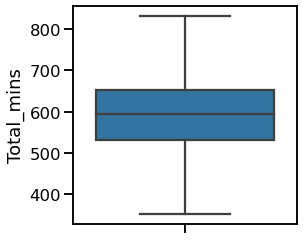

In [17]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df["Total_mins"], showfliers=False)

# min
# first quartile (25th percentile)
# median (50th percentile)
# third quartile (75th percentile)
# max
# range = max-min
# IQR (inter-quartile range) = third quartile - first quartile

plt.show()

#### Separate the numerical columns

In [18]:
def separate_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [19]:
numeric_cols = separate_num_cols(df)

print(numeric_cols)

['Account_Length', 'Vmail_Message', 'CustServ_Calls', 'Total_mins', 'Total_calls', 'Total_charges']


#### Create a for loop to show the boxplots of all numeric features

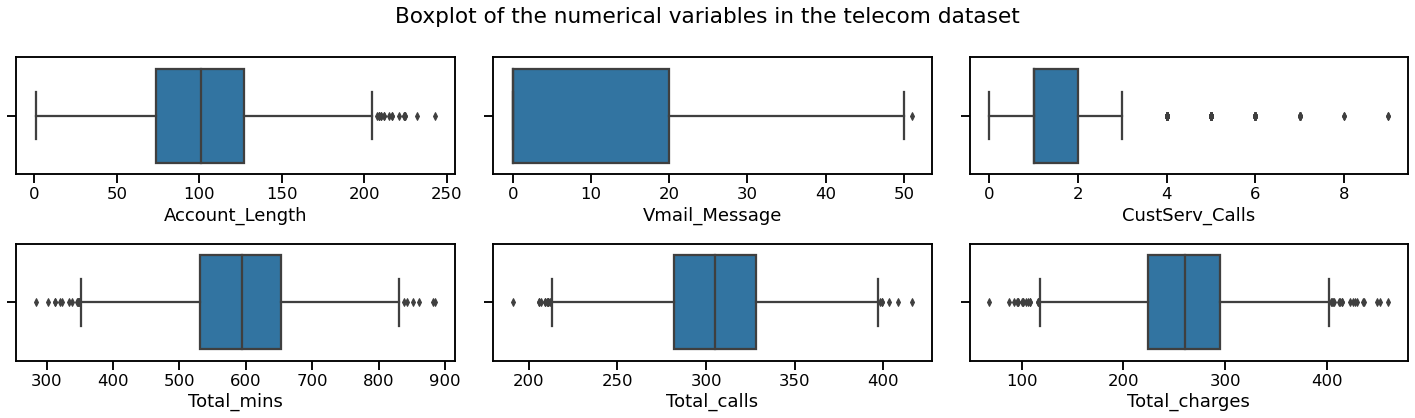

In [20]:
plt.figure(figsize=(20,6))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[numeric_cols[index]])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

#### adding categorical features in the boxplot

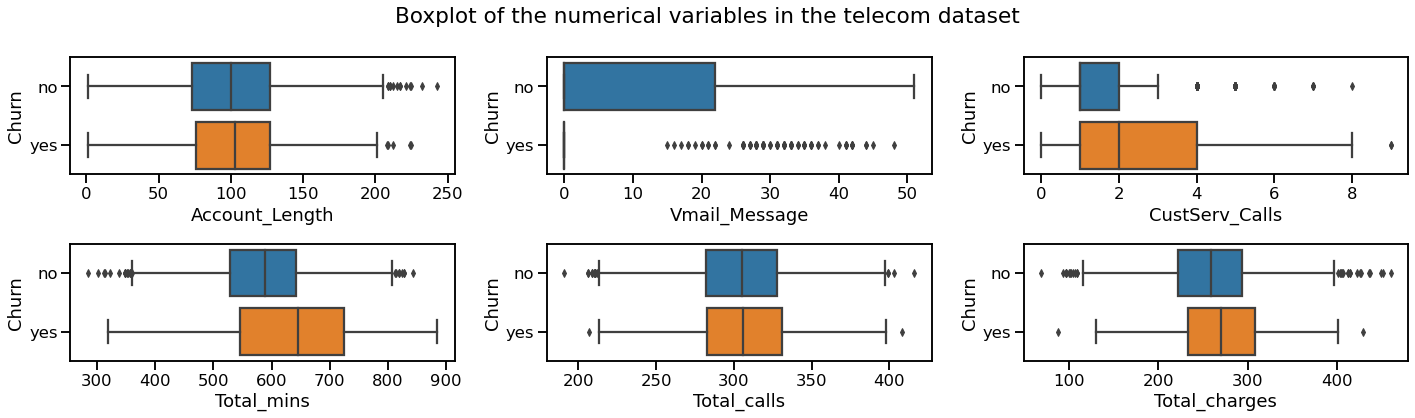

In [21]:
plt.figure(figsize=(20,6))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[numeric_cols[index]], y=df['Churn'])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

#### adding categorical features (hue) in the boxplot

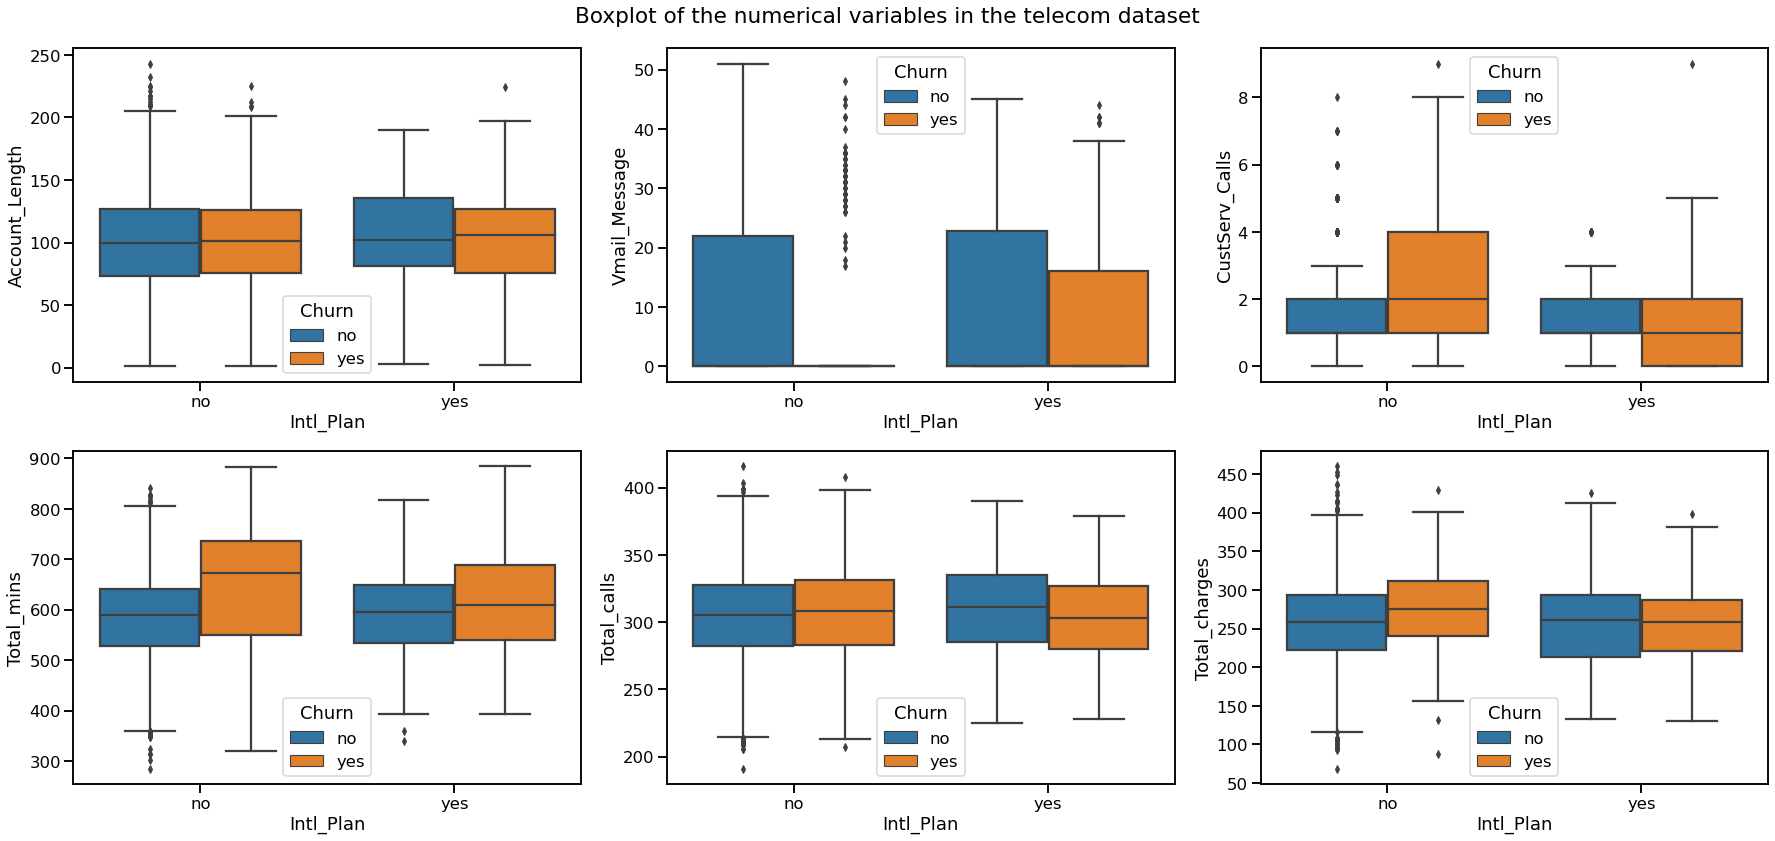

In [22]:
plt.figure(figsize=(25,12))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[numeric_cols[index]], x=df['Intl_Plan'], hue=df['Churn'])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

#### Comparing boxplots and violinplot

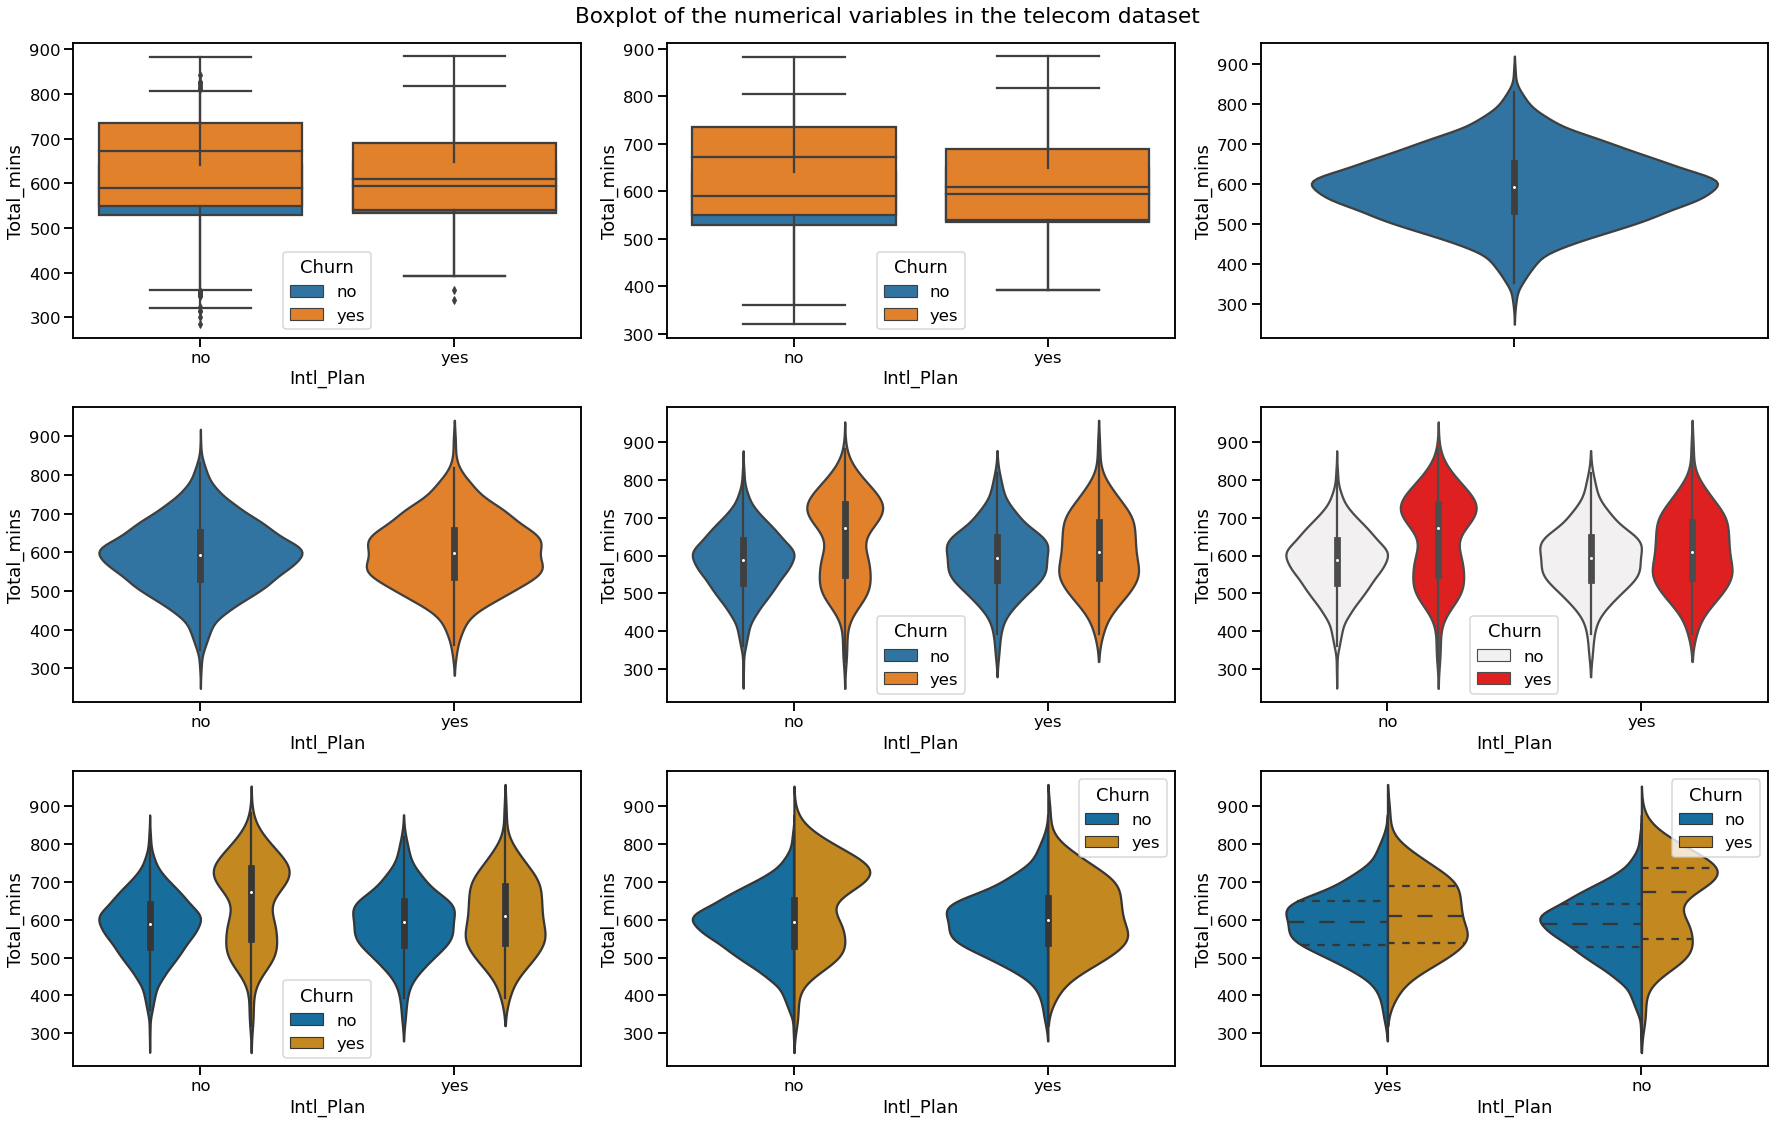

In [23]:
plt.figure(figsize=(25,16))

# row 1, column 1
plt.subplot(3,3,1)
sns.boxplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], dodge=False)

# row 1, column 2
plt.subplot(3,3,2)
sns.boxplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], dodge=False, showfliers = False)

# row 1, column 3
plt.subplot(3,3,3)
sns.violinplot(y=df['Total_mins'])

# row 2, column 1
plt.subplot(3,3,4)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'])

# row 2, column 2
plt.subplot(3,3,5)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'])

# row 2, column 3
plt.subplot(3,3,6)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], color='red')

# row 3, column 1
plt.subplot(3,3,7)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], palette="colorblind")

# row 3, column 2
plt.subplot(3,3,8)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], palette="colorblind", split=True)

# row 3, column 3
plt.subplot(3,3,9)
sns.violinplot(y=df['Total_mins'], x=df['Intl_Plan'], hue=df['Churn'], 
            palette="colorblind", split=True, order=["yes", "no"], inner="quartile")

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()